# Diffusion example

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Load data

In [29]:
u_i = pd.read_csv('../../data/frequency/2015_2016_user_unique.tsv', sep='\t', index_col=0)
f_w = pd.read_csv('../../data/frequency/2015_2016_tf_norm.tsv', sep='\t', index_col=0)
m_i = pd.read_csv('../../data/frequency/2015_2016_user_words.tsv', sep='\t', index_col=0)

In [30]:
vocab = u_i.index.tolist()

In [31]:
test_date = '2015-06'
u_i = u_i[test_date]
f_w = f_w[test_date]
m_i = m_i[test_date]

In [32]:
f_w = f_w.loc[vocab]
f_w.fillna(0, inplace=True)

In [33]:
m1 = m_i.sum()
m2 = (m_i**2).sum()
m3 = (m_i**3).sum()

In [7]:
print(m1)
print(m2)
print(m3)

1661479460.0
6.15048625703e+14
1.16542886013e+22


In [34]:
test_word = 'please'
u = u_i.loc[test_word]
f = f_w.loc[test_word]
print('word %s has %d unique users and frequency %.3E'%(test_word, u, f))
denom = f * m1 - .5 * (f ** 2) * m2 + (1./6) * (f ** 3) * m3
diffusion = u / denom
print('word %s has diffusion %.3E'%(test_word, diffusion))

word please has 175931 unique users and frequency 1.616E-03
word please has diffusion 2.148E-08


In [35]:
test_word = 'freee'
u = u_i.loc[test_word]
f = f_w.loc[test_word]
print('word %s has %d unique users and frequency %.3E'%(test_word, u, f))
denom = f * m1 - .5 * (f ** 2) * m2 + (1./6) * (f ** 3) * m3
diffusion = u / denom
print('word %s has diffusion %.3E'%(test_word, diffusion))

word freee has 267 unique users and frequency 9.625E-08
word freee has diffusion 1.681E+00


Show all words.

In [36]:
expected = f_w * m1 - .5 * (f_w ** 2) * m2 + (1./6) * (f_w ** 3) * m3
diffusion = u_i / expected
diffusion.fillna(0, inplace=True)
diffusion.replace(pd.np.inf, 0, inplace=True)
diffusion.sort_values(ascending=False, inplace=True)
diffusion = diffusion[diffusion > 0.]
print(diffusion)

looot            2.044150e+00
flibusta         1.951502e+00
faaar            1.762761e+00
waaayyy          1.715014e+00
freee            1.681401e+00
preeetty         1.513972e+00
reeeally         1.506139e+00
muuuch           1.420186e+00
juuust           1.367709e+00
verrry           1.332606e+00
reaaally         1.256148e+00
baaad            1.229904e+00
cuuute           1.183318e+00
pleeease         1.151144e+00
ittt             1.134797e+00
helll            1.119514e+00
suuuper          1.083752e+00
neeed            1.060458e+00
veeery           1.059353e+00
alll             1.052522e+00
brooo            9.958365e-01
liveuamap        9.757511e-01
youtubeonfire    9.757511e-01
seee             9.726956e-01
plsss            9.707287e-01
shiiit           9.509884e-01
mayyybe          9.419286e-01
pleaseee         9.404116e-01
thaaat           9.377774e-01
gooo             8.670181e-01
                     ...     
right            1.901772e-08
something        1.802213e-08
going     

## Top-k words

In [37]:
top_k = 20
vocab = diffusion.index.tolist()
combined_stats = [u_i, expected, f_w, diffusion]
combined_stats = pd.concat(combined_stats, axis=1)
combined_stats = combined_stats.loc[vocab]
stat_names = ['u_i', '~u_i', 'f_w', 'D_u']
combined_stats.columns = stat_names
for stat_name in stat_names:
    print('sort by %s'%(stat_name))
    combined_stats.sort_values(stat_name, ascending=False, inplace=True)
    top_words = combined_stats[:top_k]
    print('top %s words:\n%s'%(stat_name, top_words))
    bottom_words = combined_stats[-top_k:]
    print('bottom %s words:\n%s'%(stat_name, bottom_words))

sort by u_i
top u_i words:
              u_i          ~u_i       f_w           D_u
like    1117272.0  1.619218e+15  0.009412  6.900072e-10
just    1105680.0  1.921785e+15  0.009965  5.753402e-10
can      972129.0  8.182447e+14  0.007496  1.188066e-09
get      950611.0  5.000198e+14  0.006361  1.901147e-09
one      942424.0  5.091128e+14  0.006400  1.851110e-09
think    828579.0  2.523895e+14  0.005065  3.282938e-09
will     805931.0  3.056751e+14  0.005399  2.636561e-09
time     791483.0  1.466008e+14  0.004226  5.398899e-09
know     788376.0  1.270281e+14  0.004029  6.206313e-09
really   777372.0  1.670106e+14  0.004414  4.654627e-09
good     748054.0  1.373116e+14  0.004135  5.447857e-09
people   729860.0  3.945617e+14  0.005878  1.849799e-09
much     719061.0  7.944358e+13  0.003445  9.051216e-09
see      693445.0  6.808391e+13  0.003273  1.018515e-08
now      667506.0  6.932698e+13  0.003293  9.628373e-09
make     652662.0  6.353165e+13  0.003198  1.027302e-08
want     646606.0  5.

Looks like sorting by unique users ($u_{i}$) and frequency ($f_{w}$) produces the same set of top and bottom words, but the top diffusion ($D_{u}$) words are near the bottom of the frequency and unique user lists (but not at the  bottom!) and the bottom diffusion words are at the top of the frequency unique user lists.

## Expected vs. actual user counts
Comparing expected and actual user counts.

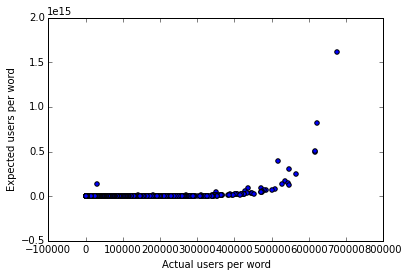

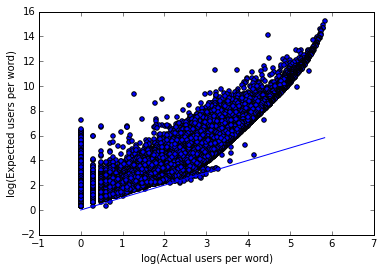

In [20]:
expected_smooth = expected[expected > 0].min()
expected_smooth = pd.np.log10(expected + expected_smooth)
u_i_smooth = u_i[u_i > 0].min()
u_i_smooth = pd.np.log10(u_i + u_i_smooth)
plt.figure()
plt.scatter(u_i, expected)
plt.xlabel('Actual users per word')
plt.ylabel('Expected users per word')
plt.show()
plt.figure()
plt.scatter(u_i_smooth, expected_smooth)
plt.plot([u_i_smooth.min(), u_i_smooth.max()], [u_i_smooth.min(), u_i_smooth.max()])
plt.xlabel('log(Actual users per word)')
plt.ylabel('log(Expected users per word)')
plt.show()

Looks like the expected user count is always several orders greater than the actual user count, which generates artificially low diffusion values.

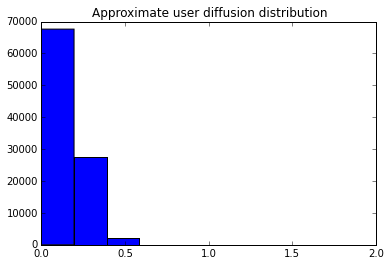

In [11]:
# show diffusion distribution
plt.figure()
plt.hist(diffusion)
plt.title('Approximate user diffusion distribution')
plt.show()

## More accurate expected values
Computed using the Altmann et al. (2011) formula.

In [ ]:
# actual expected user counts
pd.np.random.shuffle(f_w)
sample_size = 500
sample_vocab = f_w.index[:sample_size]
f_w_sample = f_w.loc[sample_vocab]
expected_0 = (1. - pd.np.exp(-pd.np.outer(m_i,f_w_sample))).sum(axis=0)

In [ ]:
expected_0_smooth = expected_0[expected_0 > 0].min()
expected_0_smooth = pd.np.log10(expected_0 + expected_0_smooth)
u_i_smooth = u_i[u_i > 0].min()
u_i_smooth = pd.np.log10(u_i + u_i_smooth)
u_i_smooth = u_i_smooth.loc[f_w_sample.index]
plt.figure()
plt.scatter(u_i_smooth, expected_0_smooth)
plt.plot([u_i_smooth.min(), u_i_smooth.max()], [u_i_smooth.min(), u_i_smooth.max()])
plt.xlabel('log(Actual users per word)')
plt.ylabel('log(Expected users per word)')
plt.show()

In [ ]:
sample_vocab = f_w_sample.index
diffusion_0 = u_i.loc[sample_vocab] / expected_0
diffusion_0[pd.np.isnan(diffusion_0)] = 0
diffusion_0[pd.np.isinf(diffusion_0)] = 0
plt.figure()
plt.hist(diffusion_0)
plt.title('Accurate user diffusion distribution')
plt.show()

Here we have the opposite problem: the expected counts are several orders below the actual counts, resulting in abnormally high diffusion values.

In [ ]:
diffusion_0.sort_values(inplace=True, ascending=False)
print(diffusion_0)

But the diffusion values seem to make sense: more generic words like `friends` are more diffuse than context-specific words like `country`.

## Small sample
Let's get a better understanding of exactly what's happening.

In [42]:
meta_file = '/mnt/new_hg190/corpora/reddit_tmp/monthly_submission/2015/RC_2015-06_clean_normalized_meta.bz2'
data_file = '/mnt/new_hg190/corpora/reddit_tmp/monthly_submission/2015/RC_2015-06_clean_normalized.bz2'

In [71]:
from itertools import izip
from bz2 import BZ2File
from random import random
from collections import Counter, defaultdict
def get_diffusion_data(data_file, meta_file, sample_pct=0.0001):
    # words per user
    m_i = Counter()
    # users per word
    u_i = defaultdict(set)
    # word counts
    f_w = Counter()
    meta_indices = {'user' : 1}
    meta_out = meta_file.replace('.bz2', 'sample.bz2')
    data_out = data_file.replace('.bz2', 'sample.bz2')
    ctr = 0
    try:
        with BZ2File(meta_file, 'r') as meta, BZ2File(data_file, 'r') as data:
            with BZ2File(meta_out, 'w') as meta_output, BZ2File(data_out, 'w') as data_output:
                for m, d in izip(meta, data):
                    if(random() <= sample_pct):
                        meta_output.write(m)
                        data_output.write(d)
                        user = m.split('\t')[meta_indices['user']]
                        words = d.split()
                        m_i[user] += len(words)
                        for w in words:
                            u_i[w].add(user)
                            f_w[w] += 1
                        ctr += 1
                        if(ctr % 10000 == 0):
                            print('got %d comments'%(ctr))
    # file reading breaks because meta files still being written
    except Exception, e:
        pass
    print('got %d sample lines'%(ctr))
    # change u_i to counts
    u_i = {w : len(users) for w, users in u_i.iteritems()}
    m_i = pd.Series(m_i)
    u_i = pd.Series(u_i)
    f_w = pd.Series(f_w)
    return m_i, u_i, f_w

In [49]:
sample_pct = 0.0001
m_i, u_i, f_w = get_diffusion_data(data_file, meta_file, sample_pct=sample_pct)

EOFError: compressed file ended before the logical end-of-stream was detected

In [50]:
print(ctr)
u_i = {w : len(users) for w, users in u_i.iteritems()}

1796


In [51]:
m_i = pd.Series(m_i)
u_i = pd.Series(u_i)
f_w = pd.Series(f_w)

In [53]:
# normalize frequencies
f_w /= f_w.sum()

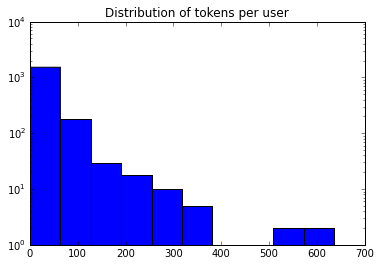

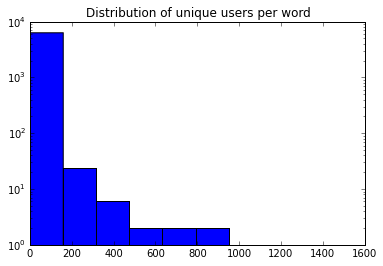

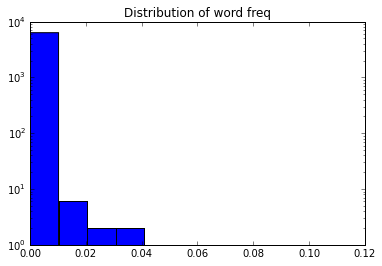

In [56]:
plt.figure()
plt.hist(m_i)
plt.title('Distribution of tokens per user')
plt.yscale('log')
plt.show()
plt.figure()
plt.hist(u_i)
plt.title('Distribution of unique users per word')
plt.yscale('log')
plt.show()
plt.figure()
plt.hist(f_w)
plt.title('Distribution of word freq')
plt.yscale('log')
plt.show()

Exponential distributions? Makes sense: most users only post a few times, most words are only used by a few users, and most words are only used a few times.

In [57]:
def get_expected_exact(f_w, m_i):
    expected = (1. - pd.np.exp(-pd.np.outer(m_i,f_w))).sum(axis=0)
    return expected
def get_expected_approx(f_w, m_i):
    m1 = m_i.sum()
    m2 = (m_i ** 2).sum()
    m3 = (m_i ** 3).sum()
    expected = f_w * m1 - .5 * (f_w ** 2) * m2 + (1./6) * (f_w ** 3) * m3
    return expected
expected_exact = get_expected_exact(f_w, m_i)
expected_approx = get_expected_approx(f_w, m_i)

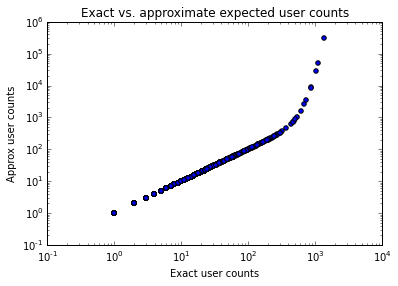

In [60]:
plt.figure()
plt.scatter(expected_exact, expected_approx)
plt.title('Exact vs. approximate expected user counts')
plt.xlabel('Exact user counts')
plt.ylabel('Approx user counts')
plt.xscale('log')
plt.yscale('log')
plt.show()

OK, there's a positive correlation between the values except toward the higher exact/approximate counts. So they shouldn't be so different when compared to actual user counts, right?

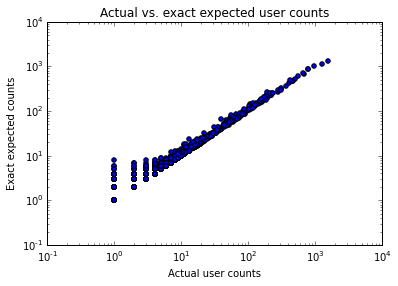

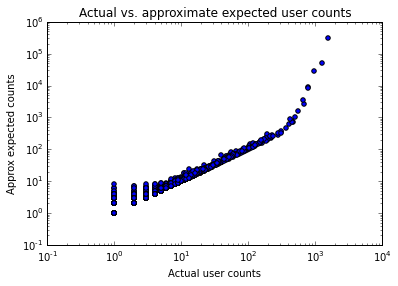

In [64]:
# now plot against actual user counts
plt.figure()
plt.scatter(u_i, expected_exact)
plt.title('Actual vs. exact expected user counts')
plt.xlabel('Actual user counts')
plt.ylabel('Exact expected counts')
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.figure()
plt.scatter(u_i, expected_approx)
plt.title('Actual vs. approximate expected user counts')
plt.xlabel('Actual user counts')
plt.ylabel('Approx expected counts')
plt.xscale('log')
plt.yscale('log')
plt.show()

Roughly the same log-log relationship. Now what about diffusion itself?

In [65]:
diffusion_exact = u_i / expected_exact
diffusion_approx = u_i / expected_approx

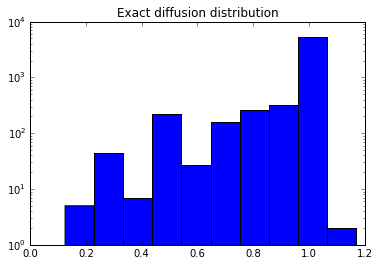

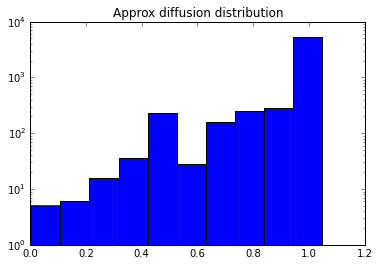

In [67]:
plt.figure()
plt.hist(diffusion_exact)
plt.title('Exact diffusion distribution')
plt.yscale('log')
plt.show()
plt.figure()
plt.hist(diffusion_approx)
plt.title('Approx diffusion distribution')
plt.yscale('log')
plt.show()

This is the opposite of what we see above but it's good! Most words have the expected number of users (1.0). Although the exact diffusion shows several words with > 1.0 diffusion which is more realistic than the approximate diffusion which shows no words above 1.0.

In [68]:
# show high/lows
diffusion_exact.sort_values(ascending=False, inplace=True)
print('exact diffusion')
print(diffusion_exact)
diffusion_approx.sort_values(ascending=False, inplace=True)
print('approx diffusion')
print(diffusion_approx)

exact diffusion
CAP-UNK       1.168932
.             1.123898
actually      1.046713
but           1.039621
right         1.037282
than          1.036780
don't         1.029315
on            1.028712
real          1.026338
least         1.026338
without       1.025443
life          1.025443
reason        1.024546
go            1.024002
SUB           1.022750
believe       1.022750
so            1.022735
idea          1.021850
wouldn't      1.020950
using         1.020950
nothing       1.020950
great         1.020144
possible      1.020049
anyone        1.020049
myself        1.020049
too           1.019751
almost        1.019147
read          1.018245
fun           1.018245
definitely    1.018245
                ...   
nose          0.334253
unpaid        0.334253
hostels       0.334253
reaction      0.334253
batteries     0.334253
definition    0.334253
batman        0.334253
delaying      0.334253
dyslexia      0.334253
guides        0.334253
obese         0.287551
rank          0.28

Actually, all these words make sense. The overly-diffuse words are the common ones, and the less diffuse ones are either hyper-common (`to`) or community-specific (`inertia`).

Larger sample?

In [72]:
sample_pct = 0.001
m_i, u_i, f_w = get_diffusion_data(data_file, meta_file, sample_pct=sample_pct)

got 10000 comments
got 20000 comments
got 30000 comments
got 40000 comments
got 49840 sample lines


In [73]:
f_w /= f_w.sum()

In [74]:
expected_exact = get_expected_exact(f_w, m_i)
expected_approx = get_expected_approx(f_w, m_i)

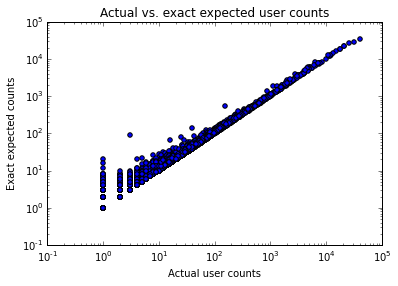

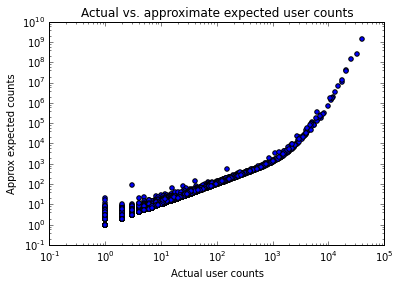

In [77]:
# now plot against actual user counts
plt.figure()
plt.scatter(u_i, expected_exact)
plt.title('Actual vs. exact expected user counts')
plt.xlabel('Actual user counts')
plt.ylabel('Exact expected counts')
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.figure()
plt.scatter(u_i, expected_approx)
plt.title('Actual vs. approximate expected user counts')
plt.xlabel('Actual user counts')
plt.ylabel('Approx expected counts')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [75]:
diffusion_exact = u_i / expected_exact
diffusion_approx = u_i / expected_approx

In [76]:
# show high/lows
diffusion_exact.sort_values(ascending=False, inplace=True)
print('exact diffusion')
print(diffusion_exact)
diffusion_approx.sort_values(ascending=False, inplace=True)
print('approx diffusion')
print(diffusion_approx)

exact diffusion
CAP-UNK        1.154106
.              1.093879
SUB            1.019570
but            1.018822
hoping         1.009216
keeps          1.008262
hopefully      1.008193
haha           1.007482
tho            1.007051
cares          1.006533
ends           1.006533
sharing        1.006458
useless        1.006308
tomorrow       1.006232
catch          1.006232
aside          1.006157
checking       1.006080
besides        1.006004
managed        1.006004
assumed        1.006004
imo            1.005927
glad           1.005792
basis          1.005774
honest         1.005693
regularly      1.005305
surprised      1.005290
hunter         1.004988
pretend        1.004988
poorly         1.004988
provided       1.004988
                 ...   
dof            0.200099
veromos        0.200099
wookie         0.200099
carat          0.200099
granddad       0.200099
jello          0.200099
scoutmaster    0.200099
mort           0.200099
muted          0.200099
dashes         0.200099


Can we match up words by frequency to compare their diffusion values?

In [85]:
# frequency matching
matches = []
diffusion_vocab = diffusion_exact.index.tolist()
for i, v in enumerate(diffusion_vocab):
    freq_diffs = abs(f_w - f_w.loc[v])
    match_freq = freq_diffs.nsmallest(n=2)[1]
    match = pd.np.random.choice(freq_diffs[freq_diffs == match_freq].index, 1, replace=False)[0]
    matches.append(match)
    if(i % 1000 == 0):
        print('processed %d words'%(i))
combined = pd.DataFrame({'word' : diffusion_vocab, 'word_diffusion' : diffusion_exact.values, 
                         'match' : matches, 'match_diffusion' : diffusion_exact.loc[matches].values})
combined.sort_values('word_diffusion', ascending=False, inplace=True)
print(combined)

              match  match_diffusion         word  word_diffusion
0                 .         1.093879      CAP-UNK        1.154106
1          CHAR-UNK         0.927536            .        1.093879
2           they're         0.919765          SUB        1.019570
3               was         0.840944          but        1.018822
4             train         0.849866       hoping        1.009216
5             lived         0.947766        keeps        1.008262
6           traffic         0.784150    hopefully        1.008193
7          majority         0.870874         haha        1.007482
8            bother         0.934252          tho        1.007051
10            study         0.821119         ends        1.006533
9             views         0.847607        cares        1.006533
11             foot         0.885683      sharing        1.006458
12        marketing         0.868458      useless        1.006308
13             bank         0.866478     tomorrow        1.006232
14        

In [86]:
combined = pd.DataFrame({'word' : diffusion_vocab, 'word_diffusion' : diffusion_approx.values, 
                         'match' : matches, 'match_diffusion' : diffusion_approx.loc[matches].values})
combined.sort_values('word_diffusion', ascending=False, inplace=True)
print(combined)

              match  match_diffusion         word  word_diffusion
0                 .         0.000130      CAP-UNK        1.008476
1          CHAR-UNK         0.000179            .        1.007750
2           they're         0.854812          SUB        1.007695
3               was         0.032430          but        1.006749
4             train         0.849243       hoping        1.006299
5             lived         0.947285        keeps        1.006299
6           traffic         0.783763    hopefully        1.006233
7          majority         0.868704         haha        1.006099
8            bother         0.933972          tho        1.006031
9             views         0.847409        cares        1.006031
10            study         0.820928         ends        1.005963
11             foot         0.885485      sharing        1.005895
12        marketing         0.868277      useless        1.005826
13             bank         0.866305     tomorrow        1.005826
14        

## New diffusion

In [2]:
u_i = pd.read_csv('../../data/frequency/2015_2016_user_unique.tsv', sep='\t', index_col=0)
f_w = pd.read_csv('../../data/frequency/2015_2016_tf_norm.tsv', sep='\t', index_col=0)
m_i = pd.read_csv('../../data/frequency/2015_2016_user_words.tsv', sep='\t', index_col=0)

In [3]:
diffusion = pd.read_csv('../../data/frequency/2015_2016_user_diffusion.tsv', sep='\t', index_col=0)

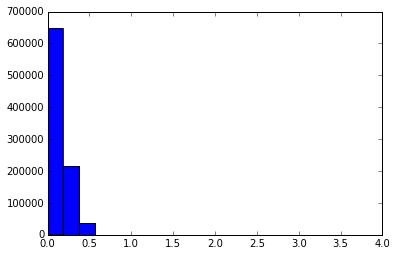

In [5]:
plt.figure()
plt.hist(diffusion.values.flatten(), bins=20)
plt.show()

In [7]:
diffusion_means = diffusion.mean(axis=1).sort_values(inplace=False, ascending=False)
diffusion_means = diffusion_means[diffusion_means > 0]
print(diffusion_means)

helll        1.558131e+00
aaahhh       1.468439e+00
nooope       1.359149e+00
preeetty     1.335944e+00
ittt         1.314106e+00
hellooo      1.267795e+00
pleeease     1.263182e+00
suuure       1.246507e+00
uggghhh      1.241556e+00
anddd        1.231563e+00
yeees        1.220089e+00
freee        1.195060e+00
hoooly       1.192679e+00
faaar        1.176585e+00
whattt       1.175451e+00
shittt       1.155887e+00
waaayyy      1.138860e+00
truuu        1.118938e+00
cuuute       1.099853e+00
verrry       1.089025e+00
brooo        1.069446e+00
muuuch       1.048660e+00
omggg        1.047722e+00
wheee        1.032719e+00
pleaseee     1.029956e+00
heyooo       1.027624e+00
looot        1.013818e+00
ssshhh       1.013151e+00
myyy         9.732450e-01
neeed        9.331290e-01
                 ...     
got          2.717216e-09
something    2.391539e-09
right        2.358415e-09
going        1.921838e-09
still        1.715396e-09
way          1.629591e-09
go           1.608940e-09
well        

## New diffusion
Computed straight from text.

In [2]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
user_diffusion = pd.read_csv('../../data/frequency/2015_2016_user_diffusion.tsv', sep='\t', index_col=0)
sub_diffusion = pd.read_csv('../../data/frequency/2015_2016_subreddit_diffusion.tsv', sep='\t', index_col=0)
user_diffusion.fillna(0, inplace=True)
sub_diffusion.fillna(0, inplace=True)

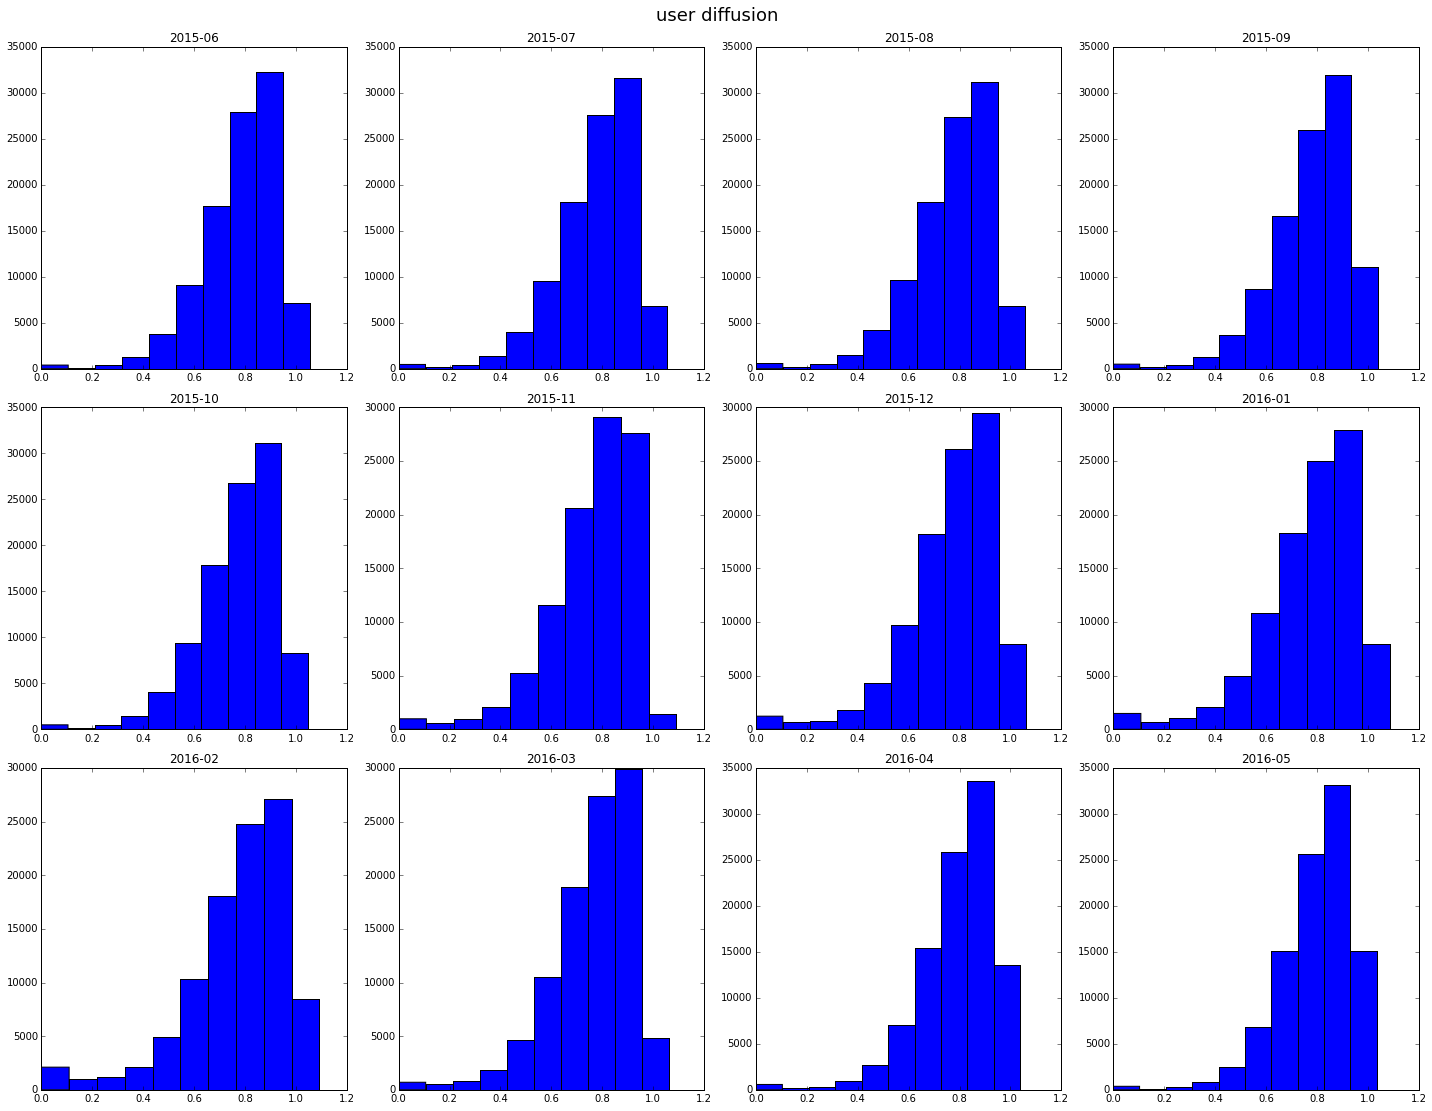

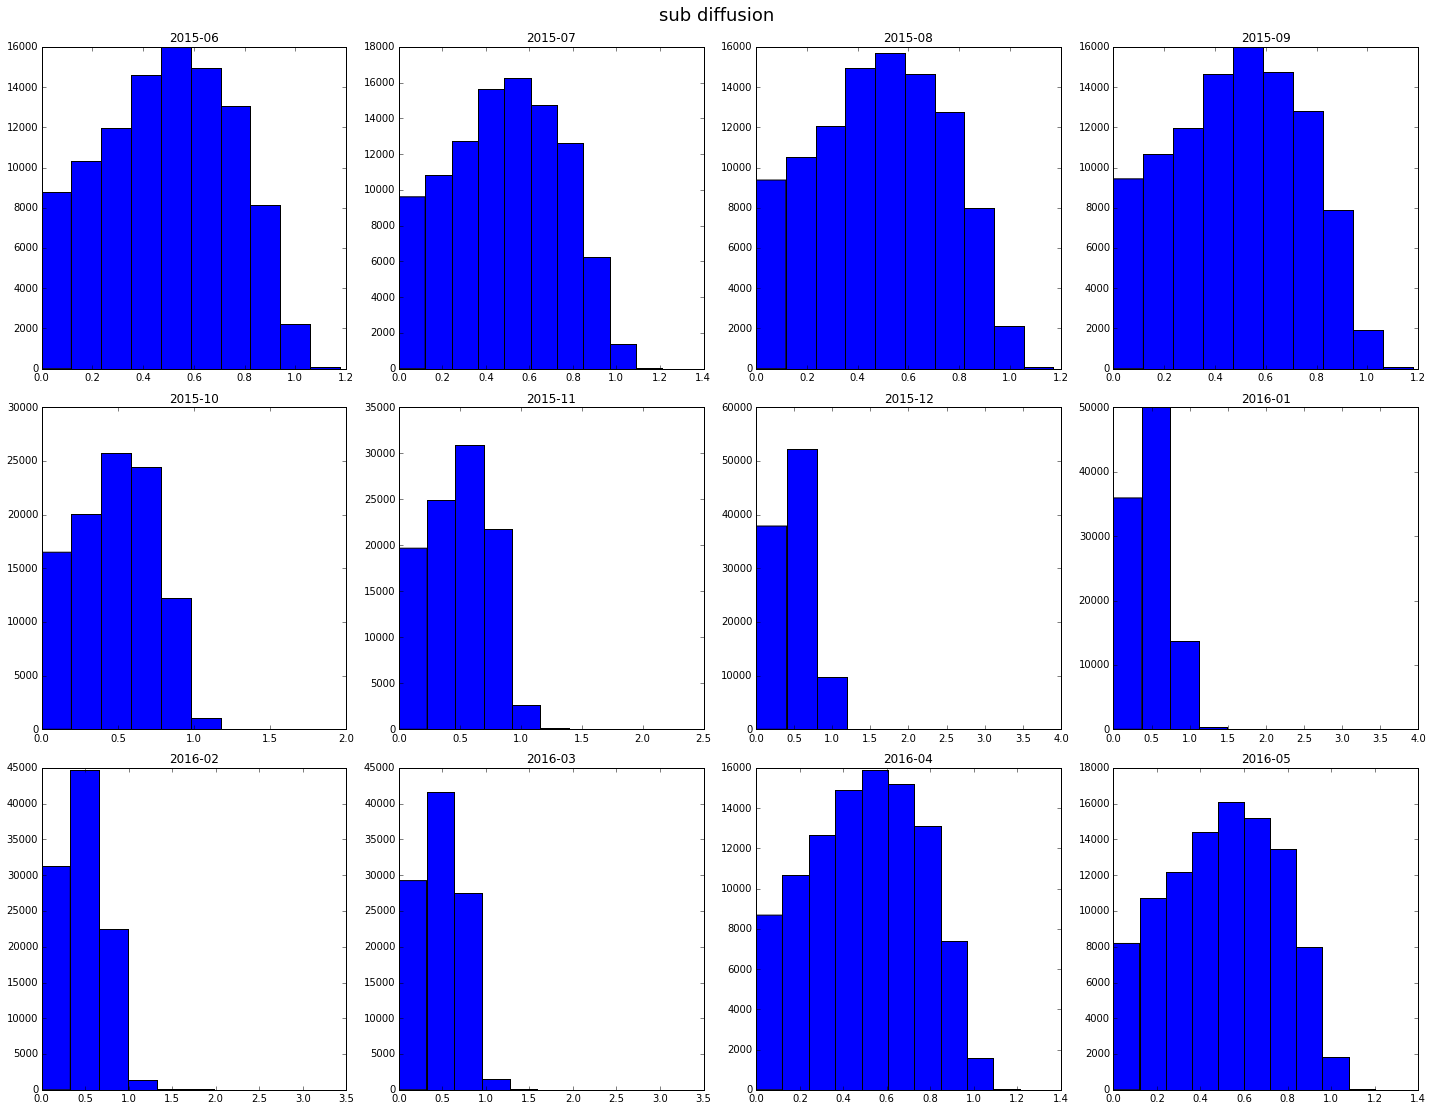

In [12]:
dates = sorted(user_diffusion.columns)
cols = 4
rows = int(len(dates) / cols) + 1
for name, values in [('user diffusion', user_diffusion), ('sub diffusion', sub_diffusion)]:
    plt.figure(figsize=(cols * 5, rows * 5))
    for i, d in enumerate(dates):
        plt.subplot(rows, cols, i+1)
        plt.hist(values[d])
        plt.title(d)
    plt.tight_layout()
    plt.suptitle(name, fontsize=18, y=1.01)
    plt.show()

User diffusion looks fine but sub diffusion hits a weird spike from 2015/10 to 2016/03. What's the deal?

In [13]:
for d in dates:
    print(sub_diffusion[d].sort_values(ascending=False, inplace=False))

thanks            1.175350
appreciated       1.172165
crosspost         1.166211
link              1.159749
posting           1.145395
seconded          1.145375
subreddit         1.137836
xpost             1.133919
SUB               1.114679
www               1.114297
sharing           1.110661
trickiest         1.107579
forewarned        1.107170
posted            1.105462
check             1.103538
post              1.101544
info              1.099454
here's            1.099323
sub               1.098447
located           1.095415
worries           1.094593
!                 1.094226
welcome           1.093563
awesome           1.092357
perusing          1.091226
thank             1.089977
sometime          1.089005
btw               1.087676
found             1.087475
finagling         1.086545
                    ...   
suuuuper          0.000000
suuuure           0.000000
annnnnd           0.000000
annnnnnnd         0.000000
celestiawut       0.000000
celestiamad       0.000000
s

So it looks like the highly diffuse words related to pirating files. Maybe we should enforce a cutoff ($<1.5$)?

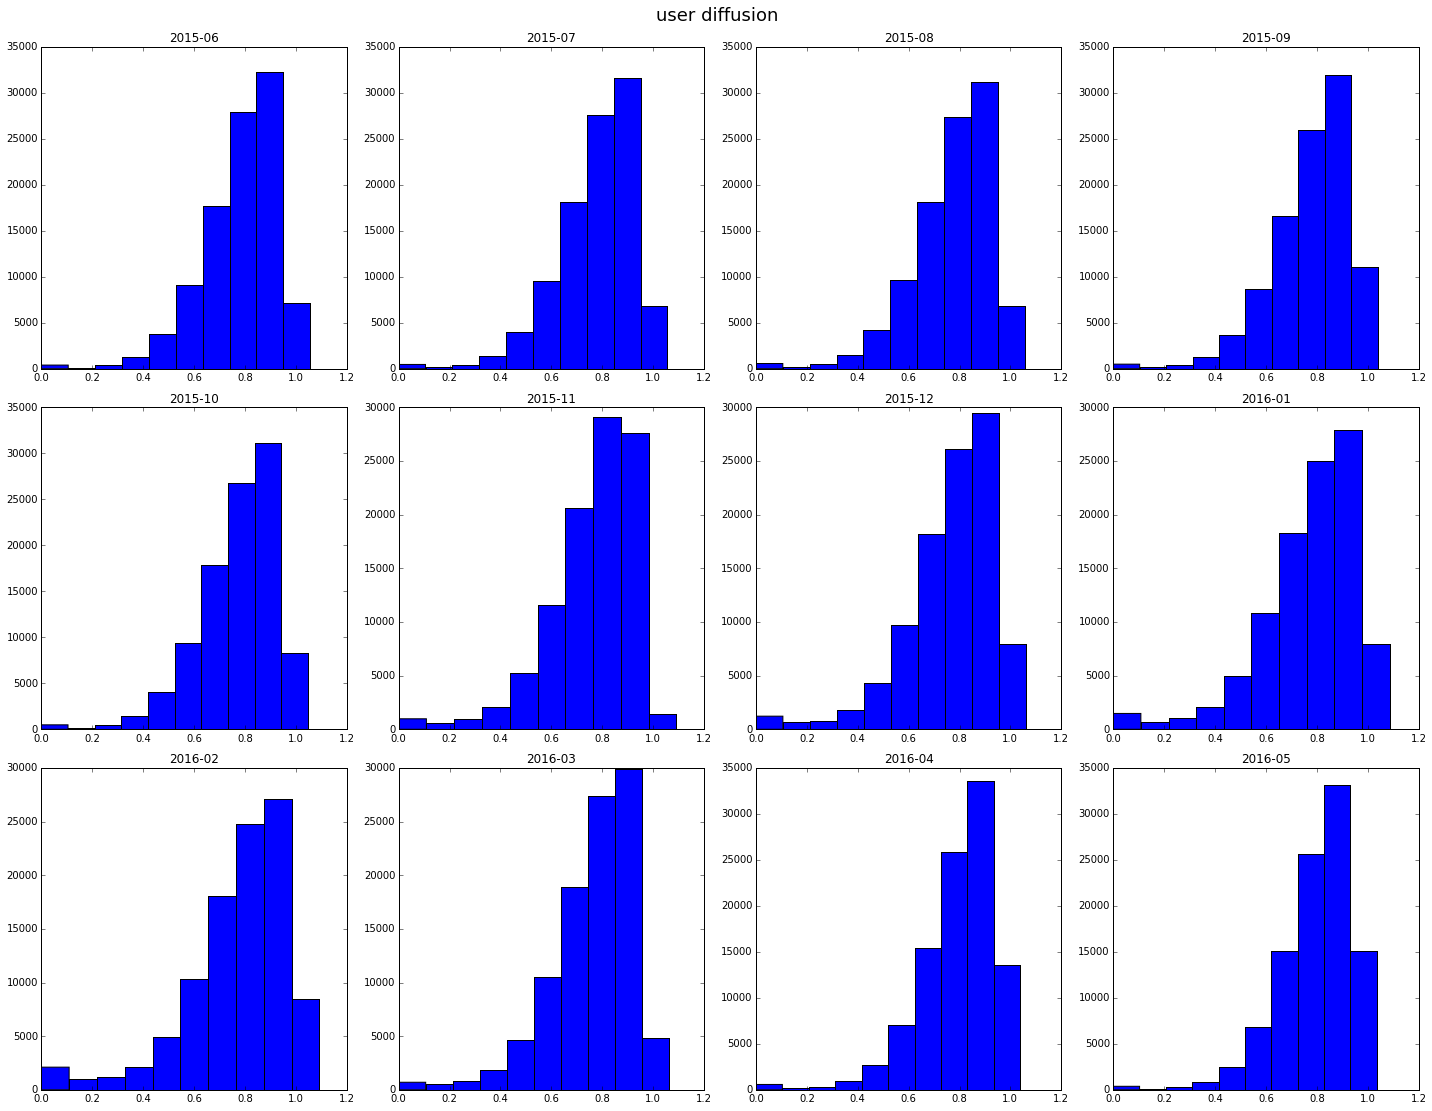

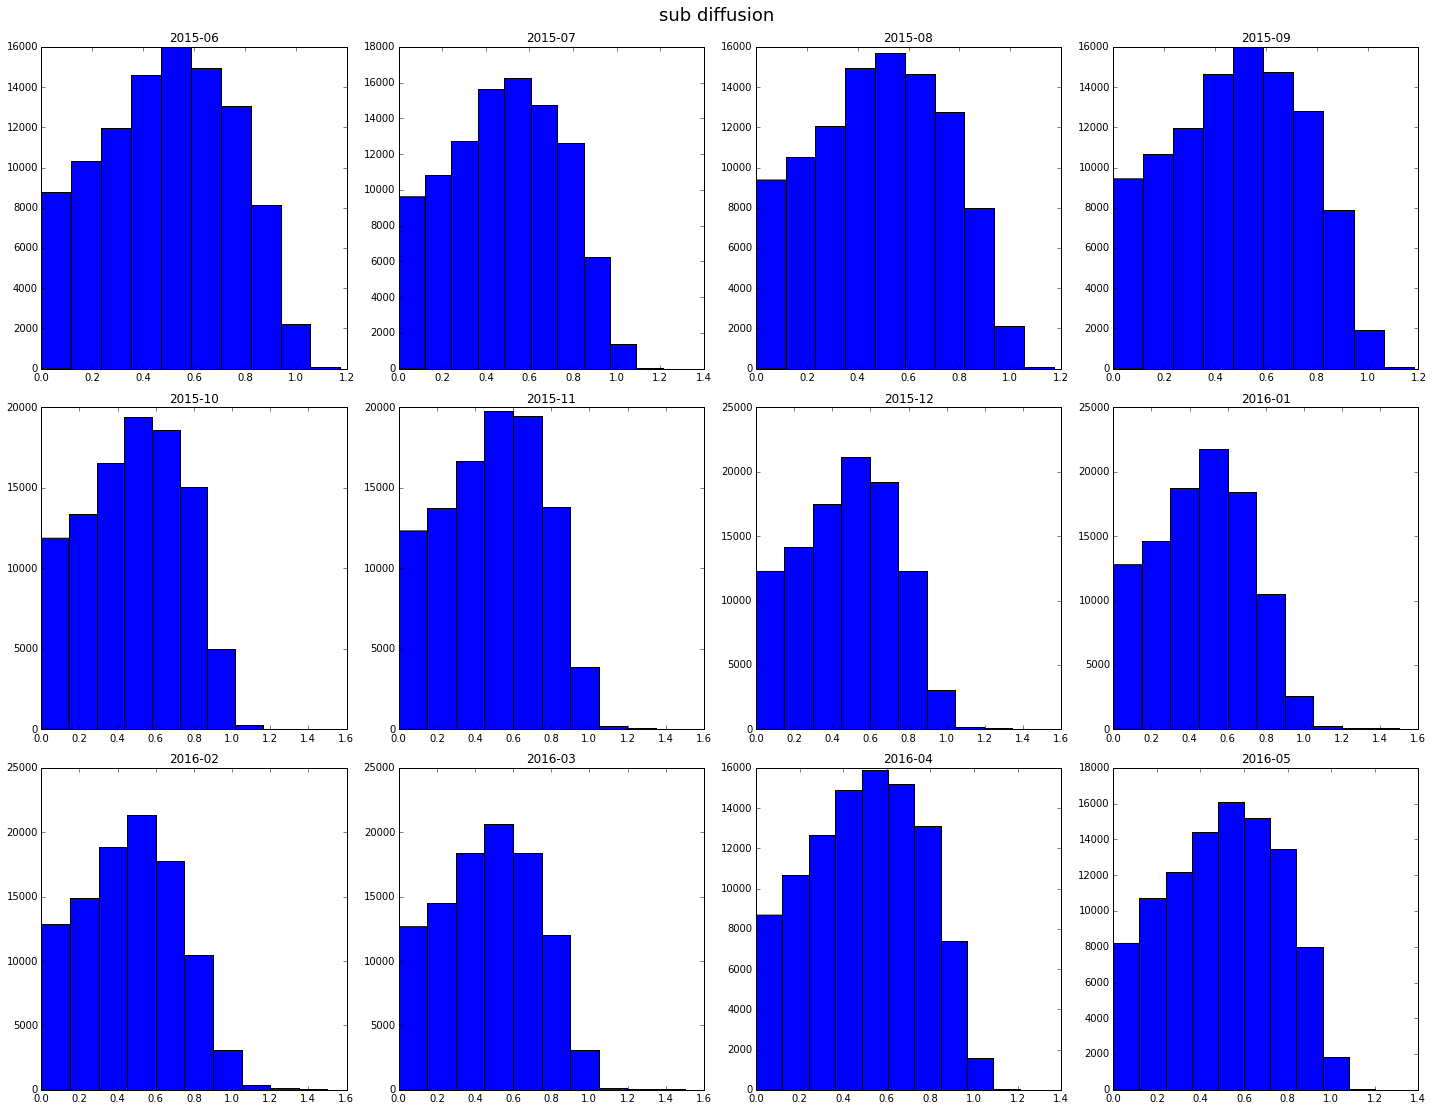

In [15]:
dates = sorted(user_diffusion.columns)
cols = 4
rows = int(len(dates) / cols) + 1
cutoff = 1.5
for name, values in [('user diffusion', user_diffusion), ('sub diffusion', sub_diffusion)]:
    plt.figure(figsize=(cols * 5, rows * 5))
    for i, d in enumerate(dates):
        vals = values[d]
        vals = vals[vals < cutoff]
        plt.subplot(rows, cols, i+1)
        plt.hist(vals)
        plt.title(d)
    plt.tight_layout()
    plt.suptitle(name, fontsize=18, y=1.01)
    plt.show()

That looks better. So the median user diffusion is around 0.7 and median subreddit diffusion is around 0.6, which is similar to Altmann et al.

In [17]:
for d in dates:
    vals = sub_diffusion[d].sort_values(ascending=False, inplace=False)
    vals = vals[vals < cutoff]
    print(len(vals))
    print(vals.head())

100135
thanks         1.175350
appreciated    1.172165
crosspost      1.166211
link           1.159749
posting        1.145395
Name: 2015-06, dtype: float64
100135
crosspost      1.211271
thanks         1.173595
appreciated    1.165813
link           1.159365
subreddit      1.158247
Name: 2015-07, dtype: float64
100135
thanks         1.170782
subreddit      1.162290
link           1.158208
appreciated    1.157804
posting        1.156993
Name: 2015-08, dtype: float64
100135
appreciated    1.180749
thanks         1.160471
xpost          1.152472
posting        1.152200
subreddit      1.148313
Name: 2015-09, dtype: float64
100114
blu           1.449583
vhsrip        1.407760
dvb           1.400283
torrentday    1.387453
following     1.381405
Name: 2015-10, dtype: float64
100082
finds         1.497932
iliad         1.497595
quotations    1.491577
dvd           1.489867
meets         1.483612
Name: 2015-11, dtype: float64
99995
cinemablend    1.491086
free           1.489515
gradesaver    

So it didn't completely clean out the noise but close! Maybe it was from Star Wars infecting everything?

## Frequency vs. diffusion

In [2]:
import pandas as pd
tf = pd.read_csv('../../data/frequency/2015_2016_tf_norm.tsv', sep='\t', index_col=0)
tf_means = tf.mean(axis=1)
user_diffusion = pd.read_csv('../../data/frequency/2015_2016_user_diffusion.tsv', sep='\t', index_col=0)
sub_diffusion = pd.read_csv('../../data/frequency/2015_2016_subreddit_diffusion.tsv', sep='\t', index_col=0)
thread_diffusion = pd.read_csv('../../data/frequency/2015_2016_thread_diffusion.tsv', sep='\t', index_col=0)

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


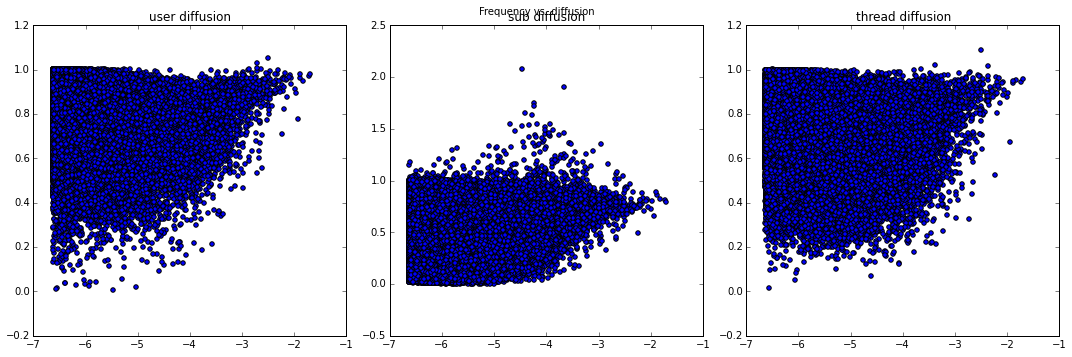

In [3]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
user_diffusion_mean = user_diffusion.mean(axis=1)
sub_diffusion_mean = sub_diffusion.mean(axis=1)
thread_diffusion_mean = thread_diffusion.mean(axis=1)
vocab = list(set(tf_means.index) & set(user_diffusion_mean.index))
name_values = [('user diffusion', user_diffusion_mean), 
               ('sub diffusion', sub_diffusion_mean), 
               ('thread diffusion', thread_diffusion_mean)]
# get smoothed tf...even though there shouldn't be any zeros?
tf_vals = tf_means.loc[vocab]
smooth = tf_vals[tf_vals > 0].min()
tf_vals = pd.np.log10(tf_vals + tf_vals)
cols = len(name_values)
rows = 1
size = 5
plt.figure(figsize=(cols * size, rows * size))
for i, (name, values) in enumerate(name_values):
    plt.subplot(rows, cols, i+1)
    plt.scatter(tf_vals, values.loc[vocab])
    plt.title(name)
plt.tight_layout()
plt.suptitle('Frequency vs. diffusion')
plt.show()

In [46]:
# reproduce percentile graphs?
from math import floor, ceil
lower = floor(tf_vals.min())
upper = ceil(tf_vals.max())
int_width = 0.25
int_count = 1 / int_width
num = (upper - lower) * int_count + 1
tf_bins = pd.np.linspace(lower, upper, num=num)
tf_bins = zip(tf_bins, tf_bins + int_width)
print(tf_bins)

[(-7.0, -6.75), (-6.75, -6.5), (-6.5, -6.25), (-6.25, -6.0), (-6.0, -5.75), (-5.75, -5.5), (-5.5, -5.25), (-5.25, -5.0), (-5.0, -4.75), (-4.75, -4.5), (-4.5, -4.25), (-4.25, -4.0), (-4.0, -3.75), (-3.75, -3.5), (-3.5, -3.25), (-3.25, -3.0), (-3.0, -2.75), (-2.75, -2.5), (-2.5, -2.25), (-2.25, -2.0), (-2.0, -1.75), (-1.75, -1.5), (-1.5, -1.25), (-1.25, -1.0), (-1.0, -0.75)]


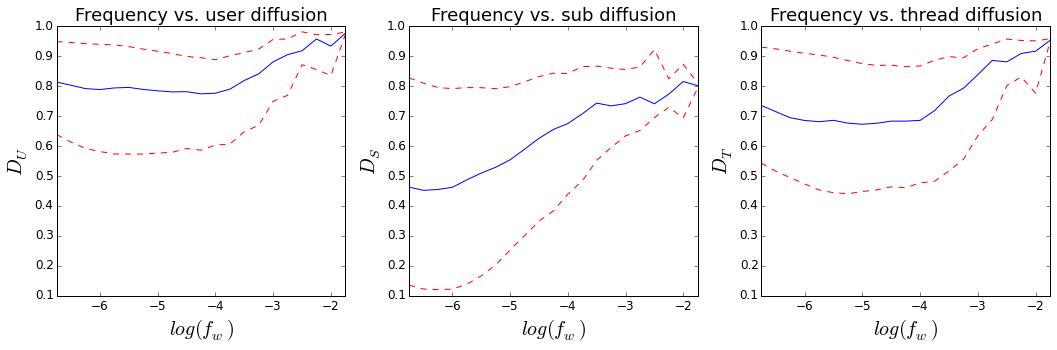

In [49]:
plt.rcParams.update({'font.size' : 12})
plt.rcParams.update({'axes.titlesize' : 18})
plt.rcParams.update({'axes.labelsize' : 20})
name_values = [('user diffusion', 'U', user_diffusion_mean), 
               ('sub diffusion', 'S', sub_diffusion_mean), 
               ('thread diffusion', 'T', thread_diffusion_mean)]
size = 5
rows = 1
cols = len(name_values)
plt.figure(figsize=(cols*size, rows*size))
lowers = zip(*tf_bins)[0]
y_lower = 0.1
y_upper = 1.0
for i, (name, var, diffusion_vals) in enumerate(name_values):
    # restrict diffusion vals to only those with 
#     unique_counts = pd.read_csv()
    plt.subplot(rows, cols, i+1)
    x_vals = []
    percentile_10_vals = []
    percentile_90_vals = []
    median_vals = []
    for lower, upper in tf_bins:
        relevant_words = tf_vals[(tf_vals >= lower) &
                                 (tf_vals < upper)].index.tolist()
#         print('tf=(%.3f, %.3f) has %d relevant words'%(lower, upper, len(relevant_words)))
        if(len(relevant_words) > 0):
            relevant_diffusion = diffusion_vals.loc[relevant_words].sort_values(inplace=False, ascending=True)
            # get 10th percentile
            percentile_10 = pd.np.percentile(relevant_diffusion, 10)
            percentile_10_vals.append(percentile_10)
            # get 90th percentile
            percentile_90 = pd.np.percentile(relevant_diffusion, 90)
            percentile_90_vals.append(percentile_90)
            # get median
            median = pd.np.median(relevant_diffusion)
            median_vals.append(median)
            # get x value
            x_vals.append(lower)
    # plot percentiles first
    plt.plot(x_vals, percentile_10_vals, 'r--')
    plt.plot(x_vals, percentile_90_vals, 'r--')
    # plot medians differently
    plt.plot(x_vals, median_vals, 'b-')
    plt.title('Frequency vs. %s'%(name))
    plt.xlabel('$log(f_w)$')
    plt.ylabel('$D_{%s}$'%(var))
#     lower = tf_bins[0][0]
    x_lower = min(x_vals)
    x_upper = max(x_vals)
    plt.xlim(x_lower, x_upper)
    plt.ylim(y_lower, y_upper)
plt.tight_layout()
plt.show()

What are the top and bottom words in each diffusion category?

In [6]:
user_diffusion_mean.sort_values(inplace=True, ascending=False)
sub_diffusion_mean.sort_values(inplace=True, ascending=False)
thread_diffusion_mean.sort_values(inplace=True, ascending=False)
name_values = [('user diffusion', user_diffusion_mean), 
               ('sub diffusion', sub_diffusion_mean), 
               ('thread diffusion', thread_diffusion_mean)]
for name, diffusion_vals in name_values:
    print(name)
    print(diffusion_vals)

user diffusion
thanks          1.051079
this            1.036194
looking         1.028999
me              1.013274
for             1.009188
looks           1.005915
alread          1.005060
pleaseeee       1.005013
biiiig          1.004399
yuuuuup         1.004135
preeeeetty      1.003814
suuuuuper       1.003730
smalle          1.002898
welllllll       1.002858
thought         1.002833
tooooooo        1.002768
ixels           1.002522
ohhhhhh         1.002498
sheeeeit        1.002472
yeahhhhhhh      1.002442
spikepushy      1.002429
thunderf        1.002429
firefighte      1.002429
slande          1.002429
twismug         1.002429
flutterwink     1.002429
wiith           1.002417
dagge           1.002401
hnnnnng         1.002371
cuuuute         1.002368
                  ...   
stedms          0.130708
gakkai          0.130511
atx             0.130125
leshade         0.126546
ooc             0.125344
lucerys         0.121748
gemle           0.120110
hiddenpower     0.119679
outletpc  

In [ ]:
# for each type of diffusion, match based on frequency
from collections import defaultdict
name_values = [('user', user_diffusion_mean), 
               ('sub', sub_diffusion_mean), 
               ('thread', thread_diffusion_mean)]
match_vals = defaultdict(list)
match_words = []
sample_size = 1000
sample_words = pd.np.random.choice(vocab, size=sample_size, replace=False)
match_vocab = [v for v in vocab if v not in sample_words]
for i, v in enumerate(sample_words):
    match = abs(tf_means.loc[match_vocab] - tf_means.loc[v]).argmin()
    match_words.append(match)
    if(i % 100 == 0):
        print('processed %d vocab'%(i))

In [10]:
len(match_words)

1000

In [16]:
# combine everything
combined_matches = {'match' : match_words}
combined_matches.update({'word_%s'%(name) : diffusion_vals.loc[sample_words].values 
                         for name, diffusion_vals in name_values})
combined_matches.update({'match_%s'%(name) : diffusion_vals.loc[match_words].values
                         for name, diffusion_vals in name_values})
# for k,v in combined_matches.iteritems():
#     print('%s = %d'%(k, len(v)))
combined_matches = pd.DataFrame(combined_matches, index=sample_words)
# print top/bottom in each diffusion category
for name, _ in name_values:
    combined_matches.sort_values('word_%s'%(name), inplace=True, ascending=False)
    print(combined_matches[['word_%s'%(name), 'match_%s'%(name), 'match']])

                  word_user  match_user           match
buuuuuuut          1.001528    0.601826       ballester
counselo           1.001230    0.716667           uspto
butttt             1.000978    0.839004        raidcall
nooooooooooooooo   0.999421    0.818916        pillager
ooooohhhh          0.997238    0.696479             mby
unsee              0.996008    0.884896         amplify
whippersnappers    0.991960    0.912817     repossessed
shiiiiit           0.990887    0.752730      deafheaven
weirds             0.985437    0.921932      recounting
crispness          0.983635    0.893915             grt
rigmarole          0.983481    0.746992         nuckols
onyl               0.981830    0.885609        moonless
godsend            0.981608    0.779655        diabetic
ratcheted          0.981345    0.812251           swash
procrastinated     0.977307    0.561561            dqxq
wrung              0.974681    0.610710       epictetus
excites            0.974318    0.585442         

Apart from the high-diffusion expresive lengthening, the values make sense: the high-diffusion words are generally more expected and less socially-distinctive than the low-diffusion ones (e.g. `panthers` $D_{T}=0.38$ vs. `overrated` $D_{T}=0.66$).

### Diffusion filtering
Remove all words used by fewer than 10 users on average? Could get rid of the expressive lengthening outliers.

In [31]:
import os
import sys
if('..' not in sys.path):
    sys.path.append('..')
from data_processing.data_handler import get_default_vocab
vocab = set(get_default_vocab())
data_dir = '../../data/frequency/'
diffusion_vocab_list = []
stat_names = ['user', 'subreddit', 'thread']
unique_counts_list = []
cutoff = 100
for s in stat_names:
    unique_stat_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) 
                         if 'unique_%s_counts_test.tsv'%(s) in f]
    unique_stat_counts = [pd.read_csv(f, sep='\t', index_col=0) for f in unique_stat_files]
    unique_stat_counts = pd.concat(unique_stat_counts, axis=1)
    unique_stat_counts = unique_stat_counts.mean(axis=1)
    unique_counts_list.append(unique_stat_counts)
    stat_vocab = list(vocab & set(unique_stat_counts[unique_stat_counts >= cutoff].index))
    print('stat %s has %d vocab'%(s, len(stat_vocab)))
    diffusion_vocab_list.append(stat_vocab)

stat user has 80095 vocab
stat subreddit has 52196 vocab
stat thread has 76651 vocab


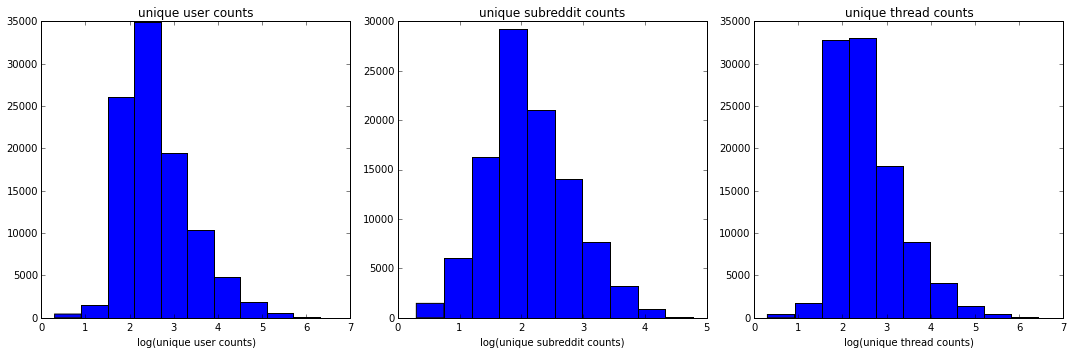

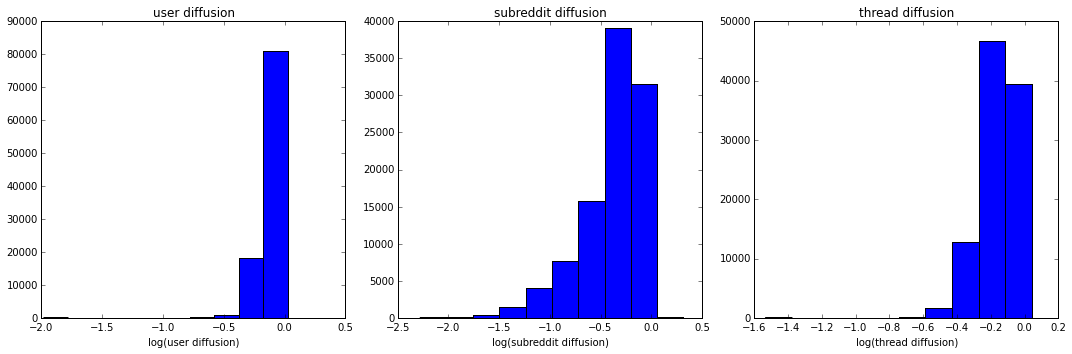

In [44]:
from itertools import izip
rows = 1
cols = 3
plt.figure(figsize=(cols * 5, rows * 5))
for i, (s, unique_counts) in enumerate(izip(stat_names, unique_counts_list)):
    plt.subplot(rows, cols, i+1)
    unique_counts_smooth = pd.np.log10(unique_counts + unique_counts[unique_counts > 0].min())
    plt.hist(unique_counts_smooth)
    plt.xlabel('log(unique %s counts)'%(s))
    plt.title('unique %s counts'%(s))
plt.tight_layout()
plt.show()
diffusion_list = [user_diffusion_mean, sub_diffusion_mean, thread_diffusion_mean]
plt.figure(figsize=(cols * 5, rows * 5))
for i, (s, diffusion) in enumerate(izip(stat_names, diffusion_list)):
    plt.subplot(rows, cols, i+1)
    diffusion_smooth = pd.np.log10(diffusion + diffusion[diffusion > 0].min())
    plt.hist(diffusion_smooth)
    plt.xlabel('log(%s diffusion)'%(s))
    plt.title('%s diffusion'%(s))
plt.tight_layout()
plt.show()

Most words are only used by a few hundred users/subreddits/threads, but spread across fewer users/subreddits/threads than expected. Hm.

In [32]:
print(user_diffusion_mean.loc[diffusion_vocab_list[0]].sort_values(inplace=False, ascending=False).head(20))
print(sub_diffusion_mean.loc[diffusion_vocab_list[1]].sort_values(inplace=False, ascending=False).head(20))
print(thread_diffusion_mean.loc[diffusion_vocab_list[2]].sort_values(inplace=False, ascending=False).head(20))

thanks        1.051079
looking       1.028999
looks         1.005915
alread        1.005060
thought       1.002833
aaaaand       1.002351
ponied        1.002281
goofiest      1.001754
thirding      1.001472
nooooo        1.001436
thirded       1.001220
trickiest     1.001151
found         1.001116
maaaaybe      1.000729
got           1.000672
unhear        1.000588
reaaaaally    1.000540
ago           0.999502
wondering     0.999473
loooong       0.999357
dtype: float64
prewiew         2.077505
description     1.903894
kickass         1.746284
registering     1.719557
djvu            1.649954
txt             1.634832
pdf             1.549066
acquire         1.547539
encyclopedia    1.541587
thepiratebay    1.541161
flibusta        1.530538
summary         1.518010
tablet          1.489338
quotes          1.485462
biography       1.479038
ipad            1.462453
wiki            1.457434
offline         1.450293
wikipedia       1.441799
eng             1.441498
dtype: float64
thanks    

In [39]:
test_word = 'hmmmm'
user_diffusion_mean_cutoff = user_diffusion_mean.loc[diffusion_vocab_list[0]]
sub_diffusion_mean_cutoff = sub_diffusion_mean.loc[diffusion_vocab_list[1]]
thread_diffusion_mean_cutoff = thread_diffusion_mean.loc[diffusion_vocab_list[2]]
stat_means = [user_diffusion_mean_cutoff, sub_diffusion_mean_cutoff, thread_diffusion_mean_cutoff]
for stat_mean, unique_stat_counts in zip(stat_means, unique_counts_list):
    print(stat_mean.loc[test_word])
    print(unique_stat_counts.loc[test_word])

0.978559956025
208.833333333
1.01331044423
100.166666667
0.996218154212
427.833333333


These outliers might have high diffusion values because they have a low user/sub/thread count and a low frequency. 

## Total word frequency sanity check
Since we saw that the 2016-04 and 2016-05 comment counts are weirdly low.

In [53]:
# test the weird drop in 2016/04 and 2016/05
tf_raw = pd.read_csv('../../data/frequency/2015_2016_tf.tsv', sep='\t', index_col=0)
tf_totals = tf_raw.sum(axis=0)
print(tf_totals)
del(tf_raw)

2015-06    786143664.0
2015-07    844276256.0
2015-08    839964956.0
2015-09    797172528.0
2015-10    865628974.0
2015-11    837629152.0
2015-12    862973190.0
2016-01    936827906.0
2016-02    912550063.0
2016-03    942743345.0
2016-04    924957457.0
2016-05    938103268.0
dtype: float64


## Test user distribution
TODO: test whether the average user/sub/thread follows a Poisson distribution in words produced